# 1. Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# 2. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [8]:
df.columns = ["target","message"]

In [9]:
df.sample(4)

,target,message
2066,ham,Then. You are eldest know.
2530,ham,So the sun is anti sleep medicine.
556,ham,Having lunch:)you are not in online?why?
2563,ham,K..k..i'm also fine:)when will you complete th...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [11]:
df.sample(4)

,target,message
4143,0,That's a shame! Maybe cld meet for few hrs tomo?
1934,0,Hope you are having a great day.
3922,0,Okay lor... Will they still let us go a not ah...
1446,0,Looks like u wil b getting a headstart im leav...


In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = "first")

In [14]:
## df = df.reset_index()

In [15]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 3. Data Analysis

In [16]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

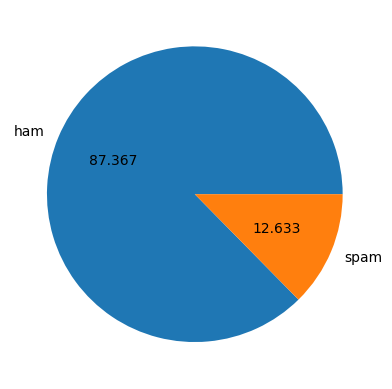

In [17]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%.3f")
plt.show()

In [18]:
## !pip install nltk
import nltk

In [19]:
## extracting number of characters
df["characters"] = df["message"].apply(len)

In [20]:
## extracting number of words
df["words"] = df["message"].apply(lambda x : len(nltk.word_tokenize(x)))

In [21]:
df["sentences"] = df["message"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [22]:
df.sample(5)

,target,message,characters,words,sentences
699,0,K..u also dont msg or reply to his msg..,40,12,1
3236,0,Ron say fri leh. N he said ding tai feng cant ...,86,21,3
2303,0,Should I tell my friend not to come round til ...,66,20,1
3184,0,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,65,15,1
1130,0,Howz pain?hope u r fine..,25,8,1


In [ ]:
# ham meassages
df[df["target"] == 0].describe()

In [ ]:
# spam messages
df[df["target"] == 1].describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df["target"] == 0]["characters"],color="blue")
sns.histplot(df[df["target"] == 1]["characters"],color="red")

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df["target"] == 0]["words"],color="blue")
sns.histplot(df[df["target"] == 1]["words"],color="red")

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df[df["target"] == 0]["sentences"],color="blue")
sns.histplot(df[df["target"] == 1]["sentences"],color="red")

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="target")

# 4. Data preprocessing

In [23]:
df.sample(4)

,target,message,characters,words,sentences
2049,0,How much is blackberry bold2 in nigeria.,40,8,1
1506,1,Thanks for the Vote. Now sing along with the s...,121,27,3
4533,0,I have no money 4 steve mate! !,31,9,2
134,1,Want 2 get laid tonight? Want real Dogging loc...,162,36,6


In [24]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

stemmer = PorterStemmer()

# function to apply text preprocessing
def text_transform(text):
    # convert to lower case
    text = text.lower()
    # tokenize the text to individual words
    text = nltk.word_tokenize(text)
    # remove special characters and convert
    lst = []
    for word in text:
        # stopwords : which helps in formation of sentences and has no special meaning
        if word.isalnum() and word not in stopwords.words("english") and word not in string.punctuation:
            lst.append(stemmer.stem(word))

    return " ".join(lst)


In [25]:
df["transformed text"] = df["message"].apply(lambda x : text_transform(x))

In [26]:
df.sample(5)

,target,message,characters,words,sentences,transformed text
3237,0,Good. No swimsuit allowed :),28,7,2,good swimsuit allow
2368,0,If you r @ home then come down within 5 min,43,11,1,r home come within 5 min
4491,0,Probably a couple hours tops,28,5,1,probabl coupl hour top
3787,1,Want to funk up ur fone with a weekly new tone...,155,30,3,want funk ur fone weekli new tone repli tones2...
1216,1,You have 1 new voicemail. Please call 08719181...,50,10,2,1 new voicemail pleas call 08719181513


In [27]:
# representation using wordcloud
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=5,background_color="white")

In [ ]:
# wordcloud of ham
plt.imshow(wc.generate(df[df["target"] == 0]["transformed text"].str.cat(sep=" "))) 
plt.show()

In [ ]:
# wordcloud of spam
plt.imshow(wc.generate(df[df["target"] == 1]["transformed text"].str.cat(sep=" "))) 
plt.show()

In [ ]:
def count_message(lst):
    word_list = []
    for msg in lst:
        for word in msg.split():
            word_list.append(word)
    return word_list

In [ ]:
spam_lst = count_message(df[df["target"] == 1]["transformed text"].tolist())
ham_lst = count_message(df[df["target"] == 0]["transformed text"].tolist())

In [ ]:
print("Total words in ham : ",len(ham_lst))
print("Total words in spam : ",len(spam_lst))

In [ ]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_lst).most_common(30))
ham_df = pd.DataFrame(Counter(ham_lst).most_common(30))

In [ ]:
spam_df.head(10)

In [ ]:
ham_df.head(10)

# 5. Text conversion

###  Bag of words

In [28]:
## https://pages.github.rpi.edu/kuruzj/website_introml_rpi/notebooks/08-intro-nlp/03-scikit-learn-text.html

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [30]:
bag_of_words =  vectorizer.fit_transform(df["transformed text"]).toarray()

In [31]:
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### tf-idf encoding

In [ ]:
## https://pages.github.rpi.edu/kuruzj/website_introml_rpi/notebooks/08-intro-nlp/03-scikit-learn-text.html

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
Tf_idf = pd.DataFrame({"tf-idf" : vectorizer.fit_transform(df["transformed text"]).toarray().tolist()})

In [ ]:
Tf_idf

### word2vec encoding

In [ ]:
## https://youtu.be/hQwFeIupNP0
## https://youtu.be/hQwFeIupNP0
## https://www.hackersrealm.net/post/word2vec-python#:~:text=Word2Vec%20is%20a%20popular%20technique,can%20be%20used%20in%20python.

In [ ]:
from gensim.models import Word2Vec
import gensim

In [ ]:
model = Word2Vec(vector_size = 100 , min_count = 1 , window = 2 , workers= 2)

In [ ]:
df["temp"] = df["transformed text"].apply(lambda x : x.split())

In [ ]:
model.build_vocab(df["temp"])
model.train(df["temp"], total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
df = df.drop(["temp"],axis=1)

In [ ]:
model.save("word2vec.model")

# 6. Training models

## Classification training

In [32]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.svm import SVC
from sklearn.naive_bayes import  GaussianNB , MultinomialNB , BernoulliNB

from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [33]:
knn = Pipeline([('Scalar 1',StandardScaler()) , ('PCA 1' , PCA(n_components=6)) , ('KNN Classifier' , KNN())])
dtc = Pipeline([('Scalar 2',StandardScaler()) , ('PCA 2' , PCA(n_components=6)) , ('DTC Classifier' , DTC())])
svc = Pipeline([('Scalar 3',StandardScaler()) , ('PCA 3' , PCA(n_components=6)) , ('SVC Classifier' , SVC())])
gnb = Pipeline([('Scalar 4',StandardScaler()) , ('PCA 4' , PCA(n_components=6)) , ('Gaussian Classifier' , GaussianNB())])
mnb = Pipeline([('Scalar 5',StandardScaler()) , ('PCA 5' , PCA(n_components=6)) , ('Multinomial Classifier' , MultinomialNB())])
bnb = Pipeline([('Scalar 6',StandardScaler()) , ('PCA 6' , PCA(n_components=6)) , ('Bernoulli Classifier' , BernoulliNB())])

In [35]:
piplines = [knn,dtc,svc,gnb,mnb,bnb]

In [ ]:
df.head(5)

### Training with bag of words

In [ ]:
x_train , x_test , y_train , y_test = tt(bag_of_words,df["target"],test_size = 0.3)

In [ ]:
df